### Importing Libraries :

Importing pandas, numpy, matplotlib.pyplot, and seaborn to enable data manipulation, numerical operations, and data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Inspection :

Data inspection involves examining and cleaning datasets to understand their characteristics, identify patterns, and assess data quality. It includes tasks such as exploratory data analysis, feature inspection, and visualization to ensure reliable and meaningful analysis.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset['Gender'] = dataset['Gender'].map({'Female': '0', 'Male': '1'})
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Selecting columns in the dataset that have data types of 'int64' or 'float64' 

In [8]:
dataset.select_dtypes(include = ['int64', 'float64']).columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Statical Info of Dataset :


Statistical information refers to data that has been analyzed and summarized using statistical methods. It includes measures such as mean, median, mode, standard deviation, and other descriptive statistics. These metrics provide a quantitative summary of a dataset, revealing central tendencies, variability, and distribution patterns. 

In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
dataset.isnull().values.any()

False

In [11]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Calculating the correlation matrix of the dataset and creating a heatmap.The heatmap visually represents the correlation matrix of the dataset, using colors to show the strength and direction of correlations. Darker shades indicate stronger correlations, while annotations display exact correlation coefficients.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\1787394318.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


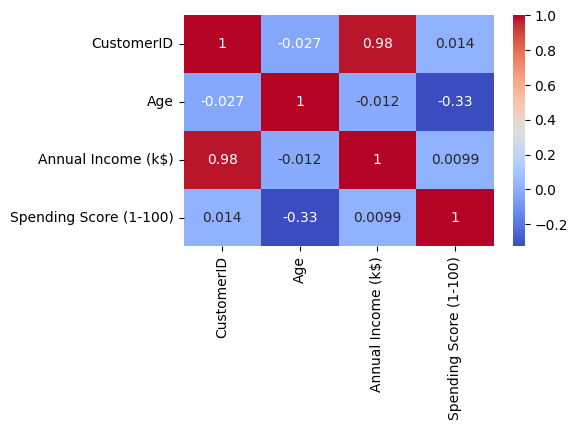

In [12]:
corr_matrix = dataset.corr()

plt.figure(figsize = (5, 3))
ax = sns.heatmap(corr_matrix,
                 annot = True, 
                 cmap = 'coolwarm')

Making copy of original dataset

In [13]:
dataframe = dataset

### Standardizing Dataset :


Standardizing a dataset involves transforming its features so that they have a mean of 0 and a standard deviation of 1. This process is often referred to as "feature scaling" or "data normalization." Standardization is a common preprocessing step in machine learning and statistics.


Importing the StandardScaler class from scikit-learn. Creating a scaler instance (sc). Standardizing the dataset using fit_transform(), centering features around zero and scaling them to have a standard deviation of one.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [15]:
dataset

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

### Clustering :


Clustering is an unsupervised learning method grouping similar data points. It identifies inherent patterns without predefined outcomes, aiming to form clusters where data points within the same group share similarities.



### KMeans :


KMeans is a partitioning clustering algorithm that divides a dataset into K clusters based on feature similarity. It iteratively assigns data points to clusters, updating centroids until convergence. Sensitive to initial centroid placement, it commonly uses methods like k-means++ for improved convergence. Widely applied in tasks like image segmentation and customer segmentation.

In [16]:
from sklearn.cluster import KMeans

Creating a loop to run the k-means clustering algorithm for different numbers of clusters (1 to 19). For each iteration, calculating the within-cluster sum of squares (WCSS) and storing the values in a list (wcss). After the loop, plotting the WCSS values against the number of clusters to find the optimal cluster number using the elbow method. The resulting plot is displayed with labels for clarity.

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

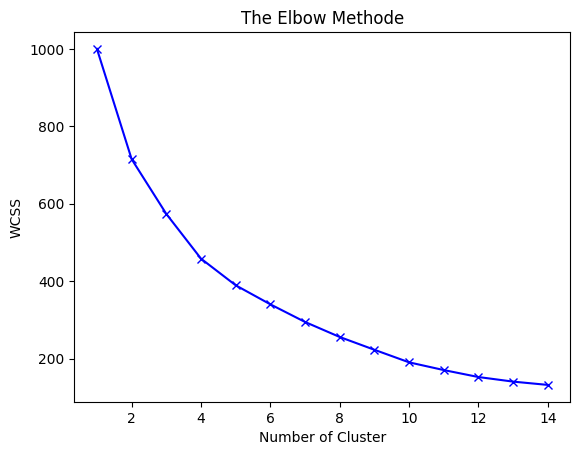

In [18]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss, 'bx-')
plt.title('The Elbow Methode')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

Importing the KElbowVisualizer class from the yellowbrick.cluster module and creating a KMeans model with a random state of 1. Initializing a KElbowVisualizer instance with a range of clusters from 1 to 15. Fitting the visualizer to the dataset to determine the optimal number of clusters using the elbow method, and displaying the resulting visualization.

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

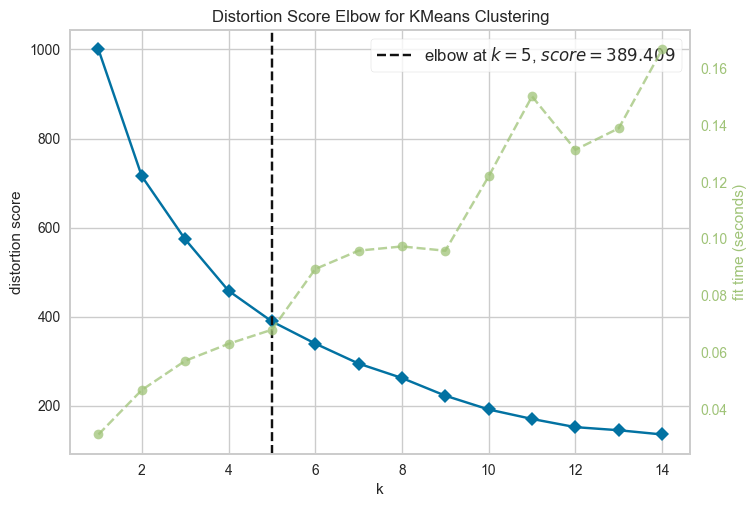

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k = (1,15))

visualizer.fit(dataset)
visualizer.show()
plt.show()


Initializing and fitting a KMeans model with 6 clusters, k-means++ initialization, and a random state of 0, then assigning the cluster labels to the variable y_kmeans

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(dataset)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3,
       4, 3, 4, 3, 3, 3, 4, 3, 3, 1, 4, 1, 4, 1, 3, 1, 1, 3, 4, 4, 1, 3,
       4, 4, 3, 3, 1, 4, 4, 4, 1, 3, 4, 1, 3, 4, 1, 1, 1, 4, 3, 1, 4, 3,
       4, 4, 4, 3, 1, 4, 4, 3, 4, 3, 1, 3, 3, 4, 1, 3, 1, 3, 4, 1, 1, 1,
       1, 3, 4, 3, 3, 3, 4, 4, 4, 4, 2, 4, 4, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Reshaping the y_kmeans array to have a single column using the reshape method and then concatenating it with the original dataframe along the second axis to create a new array bx.

In [22]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [23]:
bx = np.concatenate((y_kmeans, dataframe), axis = 1)

In [24]:
dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
dataframe_final = pd.DataFrame(data = bx, columns = ['Cluster_numbers','CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])

In [26]:
dataframe_final.head()

,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,3,1,1,19,15,39
1,3,2,1,21,15,81
2,3,3,0,20,16,6
3,3,4,0,23,16,77
4,3,5,0,31,17,40


In [27]:
dataframe_final.to_csv('clustered dataset')